In [1]:
CUDA_INDEX = 1
NAME = 'AIDS'

In [2]:
import sys
sys.path.insert(0, '../..')
sys.path.insert(0, '../../pyged/lib')

In [3]:
import os
import pickle
import random
import time

import IPython as ipy
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.cuda.set_device(CUDA_INDEX)
torch.backends.cudnn.benchmark = True
import torch.optim
import torch_geometric as tg
import torch_geometric.data
from tqdm.auto import tqdm

from neuro import config, datasets, metrics, models, train, utils, viz
import pyged

from importlib import reload
reload(config)
reload(datasets)
reload(metrics)
reload(models)
reload(pyged)
reload(train)
reload(utils)
reload(viz)

<module 'neuro.viz' from '../../neuro/viz.py'>

In [4]:
preds = [
    ('NeuroGSim     ', torch.load(f'../preds/{NAME}/inner_pred.pt', map_location='cpu')),
    ('NeuroGSim-NN  ', torch.load(f'../preds/{NAME}/nn_inner_pred.pt', map_location='cpu')),
    ('NeuroGSim-Dual', torch.load(f'../preds/{NAME}/dual_inner_pred.pt', map_location='cpu')),
    ('SimGNN        ', torch.as_tensor(np.load(f'../preds/{NAME}/sg_inner_pred.npy'))),
    ('Branch        ', torch.load(f'../preds/{NAME}/b_inner_pred.pt', map_location='cpu')),
    ('F2            ', torch.load(f'../preds/{NAME}/f2_inner_pred.pt', map_location='cpu')),
]

In [5]:
inner_test_set, _ = torch.load(f'../data/{NAME}/inner_test.pt', map_location='cpu')
queries, _, lb, ub = inner_test_set
sed = (lb+ub)/2

In [6]:
print('=== RMSE / MAE / R2 ===')
print()
for label, pred in preds:
#     print(f'{label}', end='\n')
    print(f'{metrics.rmse(lb, ub, pred):.3f}', end=' / ')
    print(f'{metrics.mae(lb, ub, pred):.3f}', end=' / ')
    print(f'{metrics.r2(lb, ub, pred)*100:.2f}')
#     print()

=== RMSE / MAE / R2 ===

0.520 / 0.406 / 98.29
0.493 / 0.390 / 98.46
0.518 / 0.406 / 98.30
0.805 / 0.611 / 95.89
1.626 / 1.341 / 83.25
2.057 / 0.934 / 73.19


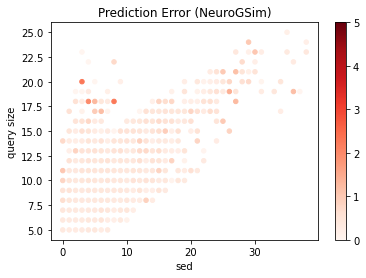

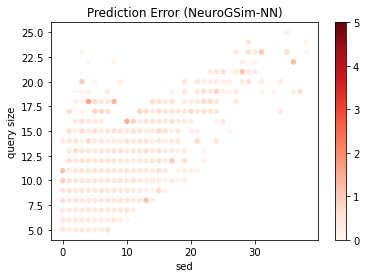

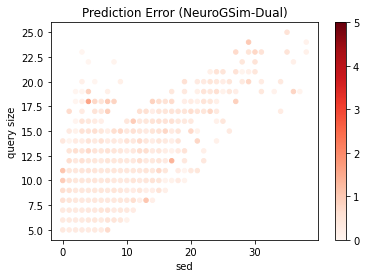

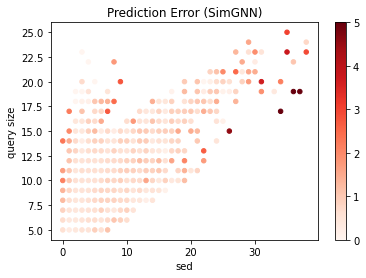

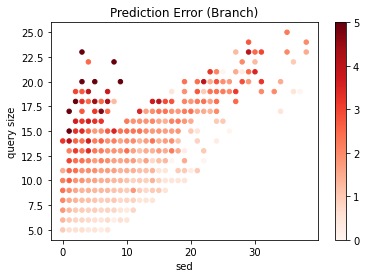

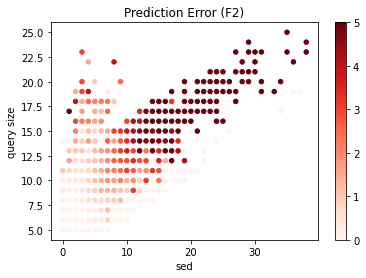

In [7]:
for label, pred in preds:
    err = metrics.err(lb, ub, pred)
    plt.figure()
    gsz = torch.tensor([g.num_nodes for g in queries])
    viz.plot_corr_2d(sed, gsz, err, xmax1=50, xmax2=25, bin_size1=1, bin_size2=1, s=20, cmap='Reds', vmax=5, vmin=0)
    plt.colorbar()
    plt.xlabel('sed')
    plt.ylabel('query size')
    plt.title(f'Prediction Error ({label.strip()})')
    plt.show()

In [11]:
for label, pred in preds:
    err = metrics.err(lb, ub, pred)
    plt.figure()
    plt.tight_layout()
    gsz = torch.tensor([g.num_nodes for g in queries])
    viz.plot_corr_2d(sed, gsz, err, xmax1=50, xmax2=25, bin_size1=1, bin_size2=1, s=25, cmap='Reds', vmax=5, vmin=0, marker='d')
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=20)
    plt.xlabel('SED', fontsize=28)
    plt.ylabel('Query Size', fontsize=28)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)
#     plt.xlabel('sed')
#     plt.ylabel('query size')
#     plt.title(f'Prediction Error ({label.strip()})')
#     plt.show()
    plt.savefig(f'../plots/Heatmap.{NAME}.{label.strip()}.eps', bbox_inches='tight')
    plt.close()